# Linear Models in Machine Learning on Python - Support Vector Machines 2

Welcome to the second notebook on Support Vector Machines. In this notebook, we will learn about Kernel Trick and explore other implementations of SVM on Python.

In [288]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

## Step 5: Kernel Trick

The primal problem can be used when your dataset has a relatively small dimension. In situations in which you have a massive dimension, you need to use something called kernel trick which changes the dimension of your data and tries to get a better separation. In machine learning, the kernel is a function that computes the dot product $\phi \left(a\right)^T\phi \left(b\right)$ based on the original vectors a and b, without really computing the high-order mapping. It computes the dot product as if it mapped the points to high order so it doesn't actually change the dimension. We can calculate $\phi \left(x_n\right)^T\phi \left(x_m\right)$ just like we calculated $x^T_nx_m$ and use this higher dimensional dot product to get a better classifier.

<div>
<img src="images/svm6.png" width="800">
</div>

Let's say that our feature is distributed as the one in 2D above. We cannot use a linear hyperplane that separates this class, however, by using the kernel trick we can map the target feature into a higher dimensional space in which we can use a linear hyperplane to separate them. So basically, we will not calculate the dot product below.

$$\phi \:\left(w\right)=\frac{1}{2}w^Tw$$

Instead, we will use the function $\phi$ to map our inputs into a higher dimensional space then the Kernel Function ($K\left(x,z\right)$) will calculate the dot product of these mapped features in higher dimensional space.

$$K\left(x,z\right)=\phi \left(x\right)^T\phi\left(z\right)$$


In this case, we also need to tune the dual problem as follows.

$$L_D\left(\lambda \right)=\sum _n\left(\lambda _n\right)-\frac{1}{2}\sum _n\sum _j\left(\lambda \:\:_n\lambda \:\:_jy_ny_jK\left(x,z\right)\right)$$

subject to

$$K\left(x,z\right)=\phi \:\left(x\right)^T\phi \left(z\right)$$

$$\sum_n\left(\lambda_ny_n\right)=0$$

$$0\:\le \lambda _n\:\le C\:for\:n=1,...,l$$

We can calculate the optimal hyperplane by using the equation below.

$$w^T\cdot x+b=\sum_n\left(\lambda \:_ny_nK\left(x,z\right)\right)+b$$

### Kernels

Let's talk about commonly used kernels

1. **Linear Kernel:** This is the standard Kernel Function that we have formulated the SVM Algorithm which is defined below.

$$K_{linear}\left(x,\:z\right)=x^Tz$$

2. **Polynomial Kernel:** Another kernel we can use is the polynomial kernel.  The polynomial kernel has some parameters that we need to specify. The polynomial kernel is defined as follows. r is called the threshold and d is the power of the kernel. I will use GridSearchCV() to tune them.

$$K_{poly}\left(x,\:z\right)=\left(x^Tz+r\right)^d$$

   
3. **Gaussian Kernel:** This kernel is the most widely used and it is generally default as it outperforms generally the other kernels. It's also called Radial Basis Kernel and it can map the features into infinite dimensional space. The equation below is the general version but generally (actually on both Python and MATLAB) the sigma part is omitted.

$$K_{rbf}\left(x,\:z\right)=exp\left(-\frac{1}{2\sigma \:^2}\left|\left|x-z\right|\right|^2\right)$$

4. **Sigmoid Kernel:** Lastly we have the sigmoid kernel

$$K_{sigmoid}\left(x,\:z\right)=tanh\left(\eta xz+r\right)$$

In fact, we can also define our own kernel but there are some rules that kernels must have to be used properly. These rules are known as Mercer's Theorem.

1. Kernel must be continuous
2. Kernel must be symmetric
3. Kernel must be positive semi-definite

Okay we are done !!!

### Additional Sources and References

Now It's time for some additional resources and references. Firstly I recommend everybody to watch Statquest's video about Polynomial and Gaussian Kernel.

1. [Polynomial Kernel](https://www.youtube.com/watch?v=Toet3EiSFcM&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=60) 
2. [Gaussian Kernel](https://www.youtube.com/watch?v=Qc5IyLW_hns&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=61)

Moreover, Ritvikmath has two very good videos about SVM and Kernels I recommend these videos as supplementary material to my notes:
1. [SVM (The Math) : Data Science Concepts](https://www.youtube.com/watch?v=bM4_AstaBZo)
2. [SVM Kernels : Data Science Concepts](https://www.youtube.com/watch?v=OKFMZQyDROI). 
3. Lastly, there is another video about Kernels that I can recommend [Kernels in Support Vector Machines (SVM)](https://www.youtube.com/watch?v=tEx-iqUX9Z4)

Moreover, I only talked about Kernel types briefly. For a deeper understanding of the properties of these functions, I can recommend reading these articles: 

1. [Support Vector Machine: Kernel Trick; Mercer’s Theorem](https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d)  
2. [Major Kernel Functions in Support Vector Machine (SVM)](https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/)  
3. [The Kernel Trick in Support Vector Classification](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f)

There are also some course notes and papers that I want to add here you can look through them for learning more about the mathematics under the hood:

1. Kernels	and	the	Kernel	Trick, The University of UTAH [link](https://svivek.com/teaching/lectures/slides/svm/kernels.pdf)
2. Support Vector Machines - Dual formulation and Kernel Trick, Carnegie Mellon University [link](https://www.cs.cmu.edu/~aarti/Class/10315_Fall20/lecs/svm_dual_kernel.pdf)
3.  Machine Learning Basics Lecture 5: SVM II, Princeton University [link](https://www.cs.princeton.edu/courses/archive/spring16/cos495/slides/ML_basics_lecture5_SVM_II.pdf)
4. You can find almost everything about SVM and especially you can also find about SMO Algorithm [link](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf)
5. That is a very brief and well-written paper about SVM [link](https://www.eecs189.org/static/notes/n20.pdf)
6. This is the main paper that I took equation from [Support Vector Machines — Kernels and the Kernel Trick](https://cogsys.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf). I love this paper because it came to my aid when I didn't understand the idea of SVM while reading Introduction to Machine Learning by Ethem Alpaydın. I also got a lot of help from Probabilistic Machine Learning: An Introduction by Kevin Patrick Murphy while writing this notebook. 
7. Lastly I want to share a channel on which you can find almost every mathematical part of Machine Learning including SVM [link](https://www.youtube.com/channel/UCt8HFaRhijEKuKY7qzvdA3A)

Now it's time to practice. Let's start by defining some functions we used previously.

In [239]:
def plot_confusion(y,y_pred):
    if isinstance(y_pred, (np.ndarray)):
        plt.figure(figsize=(10, 7))
        cm=confusion_matrix(y, y_pred)
        
        plt.figure(figsize=(10, 7))
        group_names =['TN','FS','FN','TP']
        
        group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

        labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
    
        sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20})

    else:
        
        f, axes = plt.subplots(1, 3,figsize=(18,5))
        for i in range(3):
            cm=confusion_matrix(y, y_pred[i])
            plt.figure(figsize=(10, 7))
            group_names =['TN','FS','FN','TP']
            group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
            group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
            labels = [f'{v1}\n\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(2,2)
            sns.heatmap(cm, annot=labels, fmt='', cmap='mako',annot_kws={"fontsize":20},ax=axes[i])

In [240]:
def avgprevsrecallAUC(y_predicted):
    y_score=label_binarize(y_predicted, classes=[0, 1, 2])
    y_test_binarized=label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_score.shape[1]
    precision = dict()
    prevsrec_auc=dict()
    recall = dict()
    th = dict()
    precision["micro"], recall["micro"], th["micro"] = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
    prevsrec_auc["micro"] = auc(recall["micro"], precision["micro"])
    return prevsrec_auc["micro"]

# SVC

Support Vector Classifier or SVC is the main function that we will use for implementing Support Vector Machines. It does not only provide us the Linear Kernel that we have used in the previous notebook but also the kernels that we talked about above. Let's first explore some of the parameters of that function.

1. **kernel:** We can select the kernels that I introduced by using this parameter. The available kernels are linear, sigmoid, RBF, poly, and precomputed (I never used this one but can be good to give it a try).

2. **degree:** We need to specify this parameter when we are using a polynomial kernel.

3. **gamma:** If you look at the [documentation](https://scikit-learn.org/stable/modules/svm.html#classification) of Sklearn for SVM you will see that kernels other than linear are multiplied by the term gamma. We can specify gamma with this parameter.

4. **probability**: It is used to select whether or not to return the probabilities.

5. We also have the parameter C that I introduced in the previous notebook.

**Note:** `SVC()` doesn't use One-vs-Rest strategy unlike `LinearSVC()`, It uses One-vs-One strategy internally. Also, I recommend checking out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) for exploring the parameters.

## Wine Dataset

Let's use the function. I will load the wide dataset that we used in the logistic regression notebooks.

In [241]:
from sklearn.datasets import load_wine
data = load_wine()

In [242]:
predictors=pd.DataFrame(data.data,columns=data.feature_names)
predictors.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [243]:
target=data.target

Let's use `train_test_split()`

In [244]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42,stratify = target)

Let's define the parameters that we want to optimize and use `GridSearchCV()`.

In [245]:
params1 = {
    'C':[0.25,0.50,0.60,0.75,1,5,10,50],
    'kernel': ["linear","poly","rbf","sigmoid"],
    'gamma': ["scale","auto"],
    'degree':[2,3,4,5], 
}

In [246]:
from sklearn.svm import SVC

In [247]:
svc = SVC()

In [248]:
gscv=GridSearchCV(svc, params1, cv=10,verbose=2,scoring="accuracy")

In [ ]:
model=gscv.fit(X_train,y_train)

In [250]:
y_pred=gscv.predict(X_test)

In [251]:
accuracy_score(y_pred,y_test)

0.9722222222222222

Accuracy is very high. Let's also use other metrics.

I will first plot Confusion Matrix but instead of using the Confusion Matrix Function we defined in the previous notebooks, I will use `ConfusionMatrixDisplay()` function which is very similar to `plot_confusion_matrix()` function that I introduced in the first logistic regression notebook.

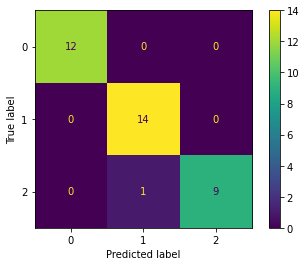

In [252]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

Let's also look at AUC score of Precision-vs-Recall Curve.

In [253]:
avgprevsrecallAUC(y_pred)

0.9768518518518519

The AUC score looks good too. Let's now use OneVsRest Classifier to see whether or not it will improve the performance.

In [254]:
model_onevsrest=OneVsRestClassifier(svc)

In [255]:
params2 = {
    'estimator__C':[0.15,0.25,0.35,0,50,0.60,0.75,1],
    'estimator__kernel': ["linear","poly","rbf","sigmoid"],
    'estimator__gamma': ["scale","auto"],
    'estimator__degree':[2,3,4,5], 
}

In [256]:
gscv=GridSearchCV(model_onevsrest, params2, cv=10,verbose=2,scoring="accuracy")

In [ ]:
model=gscv.fit(X_train,y_train)

In [258]:
y_pred=gscv.predict(X_test)

In [259]:
accuracy_score(y_pred,y_test)

0.9444444444444444

In [260]:
avgprevsrecallAUC(y_pred)

0.9537037037037037

One-vs-One strategy performs better.

## Nu-SVC

Nu SVC is a very similar implementation of SVC which almost share the same parameters as well. The difference is that instead of the parameter C that we used for regularization, we have another parameter called Nu ($\nu $) in this classifier.

**Why do we need that ?** 

The problem with C is that it is not bounded, even though I generally used values between 0 and 1 for tuning it in GridSearch we can actually pass any positive number. On the other hand, Nu is bounded between 0 and 1 which makes it easier for hyperparameter tuning because you can pass a more interpretable range. Nu is defined by the below statement in sklearn:

* An upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]

**What does that mean ?**

This means that if we set nu to 0.1 we let %10 of our data can be considered outliers (margin errors) or can be misclassified, in addition, at least %10 of our data will be used as our support vectors. So by using nu we strike a balance between the number of errors allowed and the number of support vectors ( Remember we cannot choose the number of support vectors in classical SVM algorithms that we used previously). I can recommend reading the StackOverflow discussion below for learning more about this parameter. However, I think it's better (if you fancy the mathematics behind it) to read this paper about Nu-SVC [link](http://ntur.lib.ntu.edu.tw/bitstream/246246/155217/1/09.pdf)

[What is the meaning of the nu parameter in Scikit-Learn's SVM class?](https://stats.stackexchange.com/questions/347185/what-is-the-parameter-nu-in-oneclass-svm#:~:text=According%20to%20this%20link%2C%20nu,The%20default%20is%200.1.)

Scaling matters... I did not use any scaling for SVC or LinearSVC but It makes the hyperparameter tuning process take a long time unless I do not use scaling for Nu-SVC. SVM is sensitive to scaling and it may affect drastically the time it takes for training and hyperparameter tuning. It may also improve the results, however, this can be very changeable according to the dataset you have.

Let's scale our predictors and use `train_test_split()` one more time.

In [261]:
scaler = StandardScaler()
data_scaled=scaler.fit_transform(predictors)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = 0.2, random_state = 42,stratify = target)

Now let's define `NuSVC()` and pass it to `GridSearchCV()`. The only difference will be that I will pass Nu instead of C in the params argument.

In [263]:
from sklearn.svm import NuSVC
nusvc=NuSVC()

In [264]:
params3 = {
    'nu':[0.25,0.50,0.75,0.95],
    'kernel': ["linear","poly","rbf","sigmoid"],
    'gamma': ["scale","auto"],
    'degree':[2,3], 
}

In [265]:
gscv=GridSearchCV(NuSVC(), params3, cv=10,verbose=2,scoring="accuracy")

In [ ]:
model=gscv.fit(X_train,y_train)

In [267]:
y_pred=gscv.predict(X_test)

In [268]:
accuracy_score(y_pred,y_test)

0.9722222222222222

Let's also plot Confusion Matrix and calculate AUC.

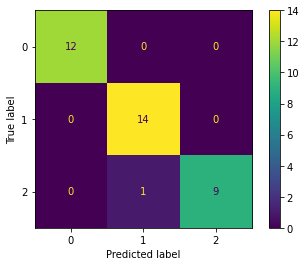

In [269]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [270]:
avgprevsrecallAUC(y_pred)

0.9768518518518519

Let's also use the OneVsRestClassifier strategy.

In [271]:
model_onevsrest=OneVsRestClassifier(nusvc)

In [272]:
params4 = {
    'estimator__nu':[0.25,0.50,0.75,0.95],
    'estimator__kernel': ["linear","poly","rbf","sigmoid"],
    'estimator__gamma': ["scale","auto"],
    'estimator__degree':[2,3,4], 
}

In [273]:
gscv=GridSearchCV(model_onevsrest, params4, cv=10,verbose=2,scoring="accuracy")

In [ ]:
model=gscv.fit(X_train,y_train)

In [286]:
y_pred=model.predict(X_test)

In [287]:
accuracy_score(y_pred,y_test)

0.9722222222222222

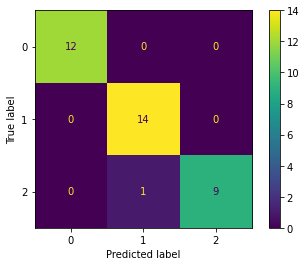

In [285]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [278]:
from sklearn.preprocessing import label_binarize
avgprevsrecallAUC(y_pred)

0.9768518518518519

Looks like both strategies works well. It's hard to know in advance which one would perform better. 

Now let's use the algorithms on a new dataset and compare them.

## MNIST Handwritten Digits 

There is a widely used dataset known as MNIST Handwritten Digits dataset. The dataset contains images of handwritten digits (0 to 9). Sklearn provides us with a version of this dataset and we will train different SVC and Nu-SVC models on that dataset.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits() #predictors
target=digits.target #target

Let's plot some of the instances and see what we have.

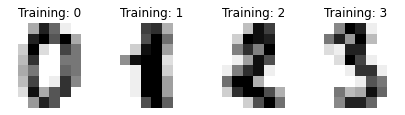

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

You may wonder why the pictures have very low resolution. It is because lower resolution makes training the model easier. 


To train our model we first need to convert every array in this dataset into one-dimensional form (this is known as flattening). Let's do it.

In [4]:
data_flattened = digits.images.reshape((len(digits.images), -1))

Another important thing is that we also need to change the `avgprevsrecallAUC()` function slightly because we will be binarizing the output for 10 classes.

In [30]:
def avgprevsrecallAUC(y_predicted,y_test):
    y_score=label_binarize(y_predicted, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y_test_binarized=label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    n_classes = y_score.shape[1]
    precision = dict()
    prevsrec_auc=dict()
    recall = dict()
    th = dict()
    precision["micro"], recall["micro"], th["micro"] = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
    prevsrec_auc["micro"] = auc(recall["micro"], precision["micro"]) # I also changed this line slightly
    return prevsrec_auc["micro"]

We are ready to train the model. Here I will make things a bit complicated. We previously defined different parameters to tune using `GridSearchCV()`. Here, I use all of these parameters to train SVC and Nu-SVC models by using both of the strategies One-vs-One and One-vs-Rest. On top of that, I use scaled and unscaled versions of the data so that we can see which one works better (I'm basically trying to use all of the combinations we have). Not to repeat the same code again and again, I also define a function that does most of the stuff for us.

In [66]:
def myclassifier(algorithm,parametrics,trn,ytrn,xtst):
    gscv_svc=GridSearchCV(algorithm, parametrics, cv=10,verbose=2,scoring="accuracy")
    predicted=gscv_svc.fit(trn,ytrn).predict(xtst)
    return predicted

In [43]:
def trainthemall(data,target,scale):
    acc=[]
    auc=[]
    if(scale==False):
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42,stratify = target)
    elif(scale==True):
        X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(data), target, test_size = 0.2, random_state = 42,stratify = target) 
    
    algorithms=[SVC(),OneVsRestClassifier(SVC()),NuSVC(),OneVsRestClassifier(NuSVC())]
    params=[params1,params2,params3,params4]
    for i in range(4):
        predict=myclassifier(algorithms[i],params[i],X_train,y_train,X_test)
        acc.append(accuracy_score(predict,y_test))
        auc.append(avgprevsrecallAUC(predict,y_test))
    df=pd.DataFrame([acc,auc])
    labels={0:'SVC',1:'OVR_SVC',2:'NuSVC',3:'OVR_NuSVC'}
    columns={0:'Accuracy',1:'Precision-vs-Recall AUC'}
    df=df.T
    df.rename(columns=columns, index=labels, inplace=True) 
    return df

Moreover, I will slightly change **params3** and **params4** because I want to tune this model a little bit further.

In [279]:
params3 = {
    'nu':[0.10,0.15,0.25,0.50,0.75,0.95],
    'kernel': ["linear","poly","rbf","sigmoid"],
    'gamma': ["scale","auto"],
    'degree':[2,3], 
}

In [280]:
params4 = {
    'estimator__nu':[0.10,0.15,0.25,0.50,0.75,0.95],
    'estimator__kernel': ["linear","poly","rbf","sigmoid"],
    'estimator__gamma': ["scale","auto"],
    'estimator__degree':[2,3], 
}

Let's train the models on unscaled data first.

In [ ]:
scores=trainthemall(data_flattened,target,False)

In [106]:
scores

,Accuracy,Precision-vs-Recall AUC
SVC,0.986111,0.986806
OVR_SVC,0.983333,0.984167
NuSVC,0.986111,0.986806
OVR_NuSVC,0.991667,0.992083


Now I will train the model using scaled data.

In [ ]:
scores=trainthemall(data_flattened,target,True)

In [112]:
scores

,Accuracy,Precision-vs-Recall AUC
SVC,0.994444,0.994722
OVR_SVC,0.986111,0.986806
NuSVC,0.994444,0.994722
OVR_NuSVC,0.988889,0.989444


Well looks like scaled version works better. 

We are actually done with SVM but there are some other functions that are related to SVM that I want to briefly introduce.

## 1. SGDClassifier

We previously used SGDRegressor in our regression examples. The classifier version provides us with an implementation of the Linear SVM algorithm and lets us use some parameters that we cannot use with LinearSVM such as elastic net penalty. SGDClassifier actually provides much more classifier algorithms which you can find in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Let's use Linear SVM with SGDClassifier on handwritten digits.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(data_flattened), target, test_size = 0.2, random_state = 42,stratify = target)

In [118]:
from sklearn.linear_model import SGDClassifier

In [119]:
sgd_classifier=SGDClassifier()

In [120]:
params = {
    'penalty': ["l2","l1","elasticnet"],
    'loss': ["hinge","squared_hinge"],
    'fit_intercept':[True,False],
    'alpha':[0.1,0.01,0.001,0.0001],
    'learning_rate':["optimal","adaptive","invscaling"],
    'eta0':[0.1,0.01,0.001],
    
}

In [121]:
gscv=GridSearchCV(sgd_classifier, params, cv=10,verbose=2,scoring="accuracy")

In [ ]:
model=gscv.fit(X_train,y_train)

In [123]:
y_pred=model.predict(X_test)

In [124]:
accuracy_score(y_pred,y_test)

0.9638888888888889

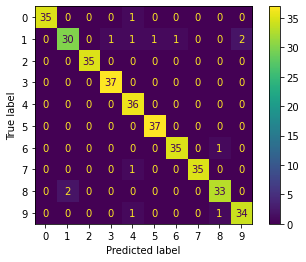

In [128]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [127]:
avgprevsrecallAUC(y_pred,y_test)

0.9656944444444445

## 2. One Class SVM

In the robust regression notebook, I said that I would talk about other methods for outlier detection. One of the techniques used for outlier detection (actually for novelty detection) is One-Class SVM. OneClassSVM works in a very similar fashion to SVM. There are two different approaches for One Class SVM, one is proposed by [Schölkopf](https://proceedings.neurips.cc/paper/1999/file/8725fb777f25776ffa9076e44fcfd776-Paper.pdf)  and the other one is proposed by [Tax and Duin](http://homepage.tudelft.nl/a9p19/papers/ML_SVDD_04.pdf). `OneClassSVM()` function of Sklearn uses the approach proposed by Schölkopf (I am a huge fan of Schölkopf but I actually like the algorithm proposed by Tax and Duin more not because I think it is a better approach but because It makes more intuitive sense for me). 

The algorithm proposed by Schölkopf basically tries to find a hyperplane that separates similar points and dissimilar points in a feature space F and then transforms this feature space back into the input space in which the decision boundary corresponds to a separation between the majority of mass(similar inputs) and the minority of mass(dissimilar inputs).

I think we can summarize the algorithm in 5 steps as follows:

1. The main objective of the algorithm is to return +1 for the region that captures most of the data and -1 elsewhere.
2. To do that the algorithm maps the data we have into a feature space and separates the data from the origin.
3. Remember that by using the kernel function we are calculating the similarity between two points. Since the inner product of points from the origin will be 0 ($⟨ϕ\left(x\right),0⟩=0$) the similarity between the most of data we have and the origin must be low.
4. The algorithm maximizes the margin from the origin so that it maximizes the distance between dissimilar points(origin) and similar points.
5. And finally, when we map the hyperplane back into the input space we get a decision boundary that separates majority of mass(similar inputs) and the minority of mass(dissimilar inputs)

Additional Sources:

1. In this article you can find a very good explanation for both of the one-class SVM approaches. [Introduction to One-class Support Vector Machines](http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/#:~:text=One%2DClass%20SVM%20according%20to%20Sch%C3%B6lkopf&text=basically%20separates%20all%20the%20data,density%20of%20the%20data%20lives.)

2. There are some StackOverFlow discussions that I strongly recommend reading : [What is one class SVM and how does it work?](https://stats.stackexchange.com/questions/99162/what-is-one-class-svm-and-how-does-it-work) and [Why One class SVM separate from the origin](https://stats.stackexchange.com/questions/313857/why-one-class-svm-seperate-from-the-origin)

3. Finally I recommend checking out an article from MachineLearningMastery about outlier detection. [link](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)

Let's use the algorithm on House Price Dataset

In [332]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [345]:
predictors=pd.DataFrame(housing.data,columns=housing.feature_names)
predictors

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Let's fit the model.

In [361]:
outlier_detector = OneClassSVM(nu=0.01)# this is the same nu in Nu-SVM

Let's fit the model on predictors.

In [362]:
threshold = ee.fit_predict(predictors)

In [363]:
threshold

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Let's return the values instances classified as inliers.

In [364]:
inliers = threshold != -1
inliers

array([ True,  True,  True, ...,  True,  True,  True])

In [365]:
predictors_cleaned = predictors[inliers]
predictors_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Let's find out what portion of the data we lost.

In [368]:
outliers = threshold == -1
outliers=predictors[outliers]

In [369]:
prtc=(len(outliers)/(len(outliers)+len(predictors)))*100

In [370]:
print('Non-outlier observations: %f',prtc )

Non-outlier observations: %f 1.0071942446043165


We only lost %1 of our data. We can tune the severity of outlier detection by changing the parameter nu.

We are done with all the SVM functions on Python. I recommend checking some examples of Sklearn about OneClassSVM which you can find here : [One-class SVM with non-linear kernel (RBF)](https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py) and [One-Class SVM versus One-Class SVM using Stochastic Gradient Descent](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgdocsvm_vs_ocsvm.html#sphx-glr-auto-examples-linear-model-plot-sgdocsvm-vs-ocsvm-py)

Also, I recommend reading the Novelty Detection documentation of Sklearn [link](https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection)


Lastly, there are two classifiers related to both Logistic Regression and SVM. I didn't want to add them here as a section but I recommend checking the documentation. You may use them in some cases.

[RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)


[KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge)